### Linear Support Vector Machines


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.colors import *

In [2]:
xBlue = np.array([0.3,0.5,1,1.4,1.7,2])
yBlue = np.array([1,4.5,2.3,1.9,8.9,4.1])
xRed = np.array([3.3,3.5,4,4.4,5.7,6])
yRed = np.array([7,1.5,6.3,1.9,2.9,7.1])

In [3]:
X = np.array([[0.3,1],[0.5,4.5],[1,2.3],[1.4,1.9],[1.7,8.9],[2,4.1],[3.3,7],[3.5,1.5],[4,6.3],[4.4,1.9],[5.7,2.9],[6,7.1]])
y = np.array([0,0,0,0,0,0,1,1,1,1,1,1]) # 0: blue class, 1: red class

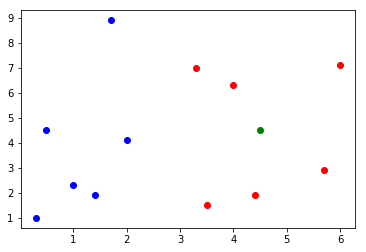

In [4]:
plt.plot(xBlue, yBlue, 'ro', color='blue')
plt.plot(xRed, yRed, 'ro', color='red')
plt.plot(4.5,4.5,'ro',color='green')

In [5]:
classifier = svm.SVC()
classifier.fit(X,y)

C:\Users\Andreas Shepley\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [6]:
coord = [4.5,4.5]
blue_red = classifier.predict([coord])

if blue_red == 1:
    print(coord," is red")
else:
    print(coord, " is blue")

[4.5, 4.5]  is red


### Let's apply this to 'real' data!

We'll be using a Support Vector Machine to predict whether a country is developed or not based its World Health Organisation life expectancy and GDP. You can access the dataset in this lecture here: https://www.kaggle.com/augustus0498/life-expectancy-who

In [7]:
import pandas as pd
from sklearn.model_selection import *
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

def load_data(DATASET_PATH):
    return pd.read_csv(DATASET_PATH)

In [8]:
DATASET_PATH = './datasets/2015.csv'
dataset = load_data(DATASET_PATH)
dataset.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [9]:
#functions
def check_NaN(dataframe):
    print("Total NaN:", dataframe.isnull().values.sum())
    print("NaN by column:\n",dataframe.isnull().sum())
    return

def fillNaN_median(dataframe, key):
    median = dataframe[key].median()
    dataframe[key].fillna(median, inplace = True)
    return 

def one_hot_encode(dataframe, col_name):
    dataframe = pd.get_dummies(dataframe, columns=[col_name], prefix = [col_name])
    return dataframe


In [10]:
dataset.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [11]:
dataset.loc[dataset['Happiness Score'] < 5, 'Happiness Score'] = 0
dataset.loc[dataset['Happiness Score'] >= 5, 'Happiness Score'] = 1


In [12]:
dataset.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,1.0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,1.0,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,1.0,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,1.0,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,1.0,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#### Choose your features: We'll be choosing Happiness Score','Trust (Government Corruption)','Economy (GDP per Capita)

In [13]:
#chosen_columns = ['Happiness Score','Economy (GDP per Capita)','Family']
chosen_columns = ['Happiness Score','Trust (Government Corruption)','Economy (GDP per Capita)']
#You can experiment with others, such as;'Measles','AdultMortality','infantdeaths','Alcohol','HepatitisB','Measles','Polio','Population','thinness5-9years','HIV/AIDS','BMI','Diphtheria','GDP']
life_expectancy = dataset.filter(chosen_columns)
life_expectancy.head()

,Happiness Score,Trust (Government Corruption),Economy (GDP per Capita)
0,1.0,0.41978,1.39651
1,1.0,0.14145,1.30232
2,1.0,0.48357,1.32548
3,1.0,0.36503,1.45900
4,1.0,0.32957,1.32629


#### Check the feature columns for NaN values and correct any missing data

In [14]:
check_NaN(life_expectancy)

Total NaN: 0
NaN by column:
 Happiness Score                  0
Trust (Government Corruption)    0
Economy (GDP per Capita)         0
dtype: int64


#### Create the train and test splits

In [15]:
x_train, x_test, y_train, y_test = train_test_split(life_expectancy.drop(['Happiness Score'], axis=1),life_expectancy['Happiness Score'],test_size=0.2,random_state=12)                                                                       
print("x train/test ",x_train.shape, x_test.shape)
print("y train/test ",y_train.shape, y_test.shape)

x train/test  (126, 2) (32, 2)
y train/test  (126,) (32,)


In [16]:
x_dev = x_train.values
y_dev = y_train.values
x_t = x_test.values
y_t = y_test.values

#### Normalisation of data is expected when using SVMs. 
Learn more here:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html 

In [17]:
#feature scaling
sc = StandardScaler()

x_dev = sc.fit_transform(x_dev)
x_t = sc.fit_transform(x_t)

#### Train the linear SVM

### Parameters for SVC: Gamma and C
A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset resulting in over-fitting.

C parameter used is to maintain regularization. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.
					


In [18]:
svm_classifier = SVC(kernel = 'linear')#gamma=0.001,C=100
svm_classifier.fit(x_dev, y_dev)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

#### Inference
Pass in the test set...

In [19]:
predictions = svm_classifier.predict(x_t)

#### Evaluation
Check out the mean squared error and accuracy

In [20]:
#mean squared error
np.mean((predictions - y_t) ** 2)

0.125

In [21]:
print("Accuracy:",str(round(metrics.accuracy_score(y_t, predictions)*100))+"%")

Accuracy: 88.0%


#### Visualise Linearly Seperable Data

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


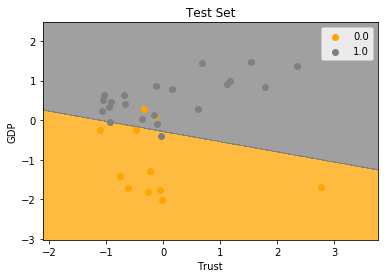

In [22]:
xs, ys = x_t, y_t

X1, X2 = np.meshgrid(np.arange(start = xs[:,0].min() - 1,stop = xs[:,0].max() + 1,step = 0.01),
                     np.arange(start = xs[:,1].min() - 1,stop = xs[:,1].max() + 1,step = 0.01))

plt.contourf(X1,X2, svm_classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('orange','grey')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i, j in enumerate(np.unique(ys)):
    plt.scatter(xs[ys==j,0],xs[ys==j,1],
                c=ListedColormap(('orange','grey'))(i),label = j)

plt.title('Test Set')
plt.xlabel('Trust')
plt.ylabel('GDP')
plt.legend()
plt.show()

### Exercise
Train an SVM using Family and Life Expectancy to predict whether a country is happy or not. Is this data linearly seperable?